In [1]:
import os
import numpy as np
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
# Data preparation
path=Path("./Dataset/") # Generator object
dirs=path.glob("*") # All files and folders

In [3]:
label_list=["Pikachu", "Bulbasaur", "Meowth"]
label_dict={
    "Pikachu": 0,
    "Bulbasaur": 1,
    "Meowth": 2
}
image_data=[]
labels=[]
for folder_dir in dirs:
    label=str(folder_dir).split('\\')[-1]
    count=0
    print(folder_dir)
    for img_path in folder_dir.glob('*.jpg'):
        img=image.load_img(img_path, target_size=(40, 40))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        count+=1
    print(count)
image_data=np.array(image_data)
labels=np.array(labels)

Dataset\Bulbasaur
173
Dataset\Meowth
70
Dataset\Pikachu
199


In [4]:
print(image_data.shape)

(442, 40, 40, 3)


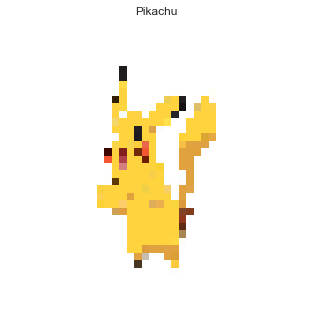

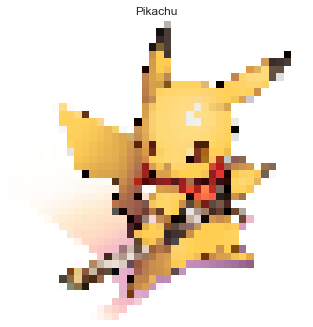

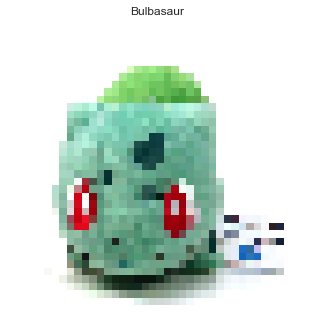

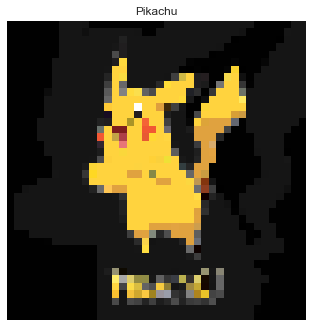

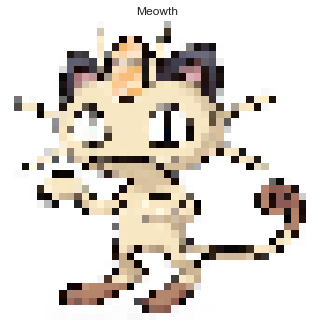

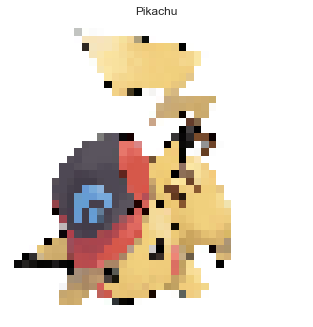

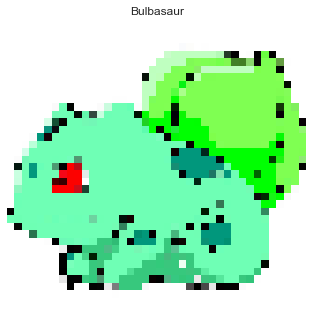

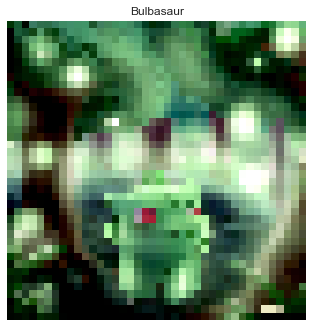

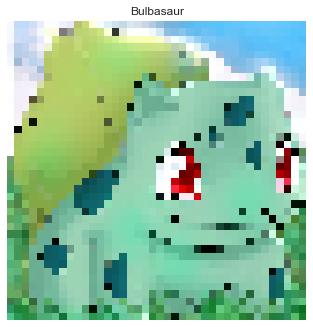

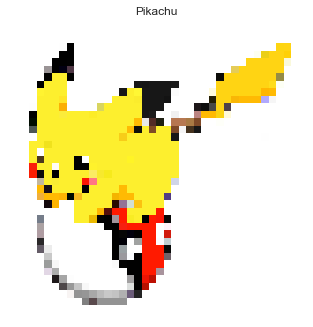

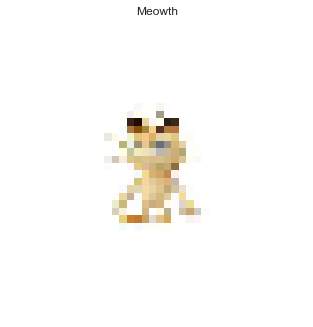

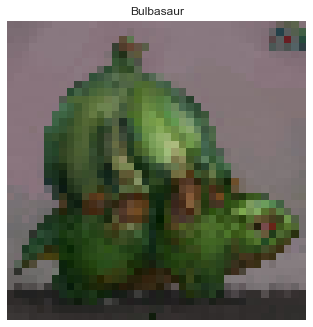

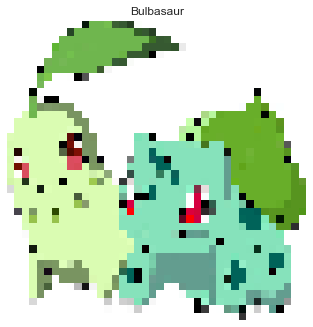

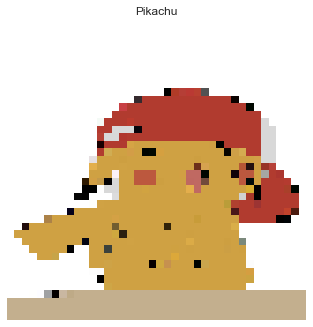

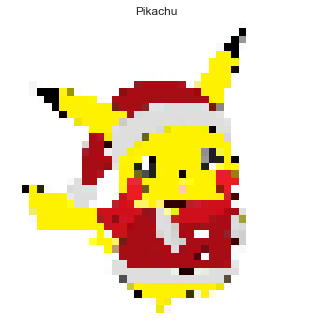

In [5]:
# Image visualizations
X, Y=image_data, labels

def drawImg(img, label):
    plt.style.use('seaborn')
    plt.axis('off')
    plt.title(label_list[label])
    plt.imshow(img)
    plt.show()
    
for i in range(15):
    idx=np.random.randint(X.shape[0])
    drawImg(X[idx]/255.0, Y[idx])

# Reshaping
X=X.reshape(X.shape[0], -1)

In [6]:
# Randomizing the data
import random
idx=np.arange(X.shape[0])
random.shuffle(idx)
Xrand, Yrand=X[idx, :], Y[idx,]
print(Yrand)

[0 1 2 0 0 2 1 0 2 0 1 2 0 1 1 0 0 0 0 0 2 1 0 0 0 1 0 1 1 2 1 0 2 1 1 1 2
 2 0 0 1 0 2 1 1 2 2 0 1 0 1 1 0 2 1 0 1 0 0 0 0 0 1 0 0 1 1 2 1 0 0 2 1 0
 0 0 1 0 0 2 2 0 0 1 0 0 0 0 1 0 2 0 0 2 0 1 1 1 0 1 0 0 0 1 0 2 0 2 1 0 1
 1 1 0 1 2 2 0 0 2 1 0 2 2 1 1 0 0 0 1 0 0 0 1 2 1 0 1 0 1 0 0 0 1 0 1 2 1
 0 0 0 0 1 0 1 0 0 1 1 2 1 2 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 2 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 2 1 0 0 1 0 2 1 0 0 2 0 1 1 1 1 0 2 0 1 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 1 2 0 0 0 0 0 1 2 2 1 2 1 1 1 1 0 0 1 0 0 1 0 2 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 2 0 1 0 1 1 0 1 2 0 1 0 1 1 0 1 1 0 1 0 0 2 1 2
 0 0 1 0 0 2 2 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 2 2 1 0 0 1 1 0 0 2 1 2
 0 2 0 1 0 1 1 0 0 1 1 0 1 2 0 0 2 0 1 0 2 0 1 1 1 2 0 0 0 1 0 0 1 1 2 0 2
 2 0 1 1 0 1 2 0 1 2 1 1 0 1 1 2 1 1 1 1 1 0 1 1 0 2 0 1 0 1 0 1 1 1 1 1 1
 0 1 0 2 1 1 1 2 1 2 1 1 0 0 2 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 2 2 2 1 2]


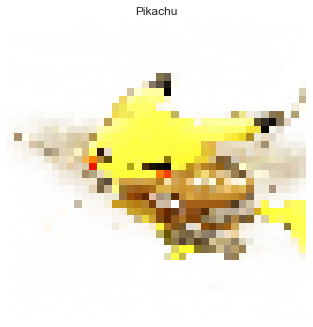

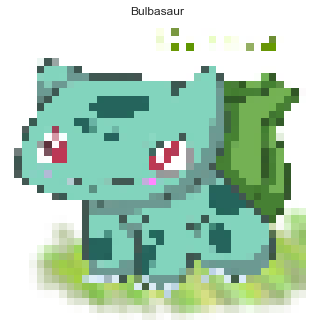

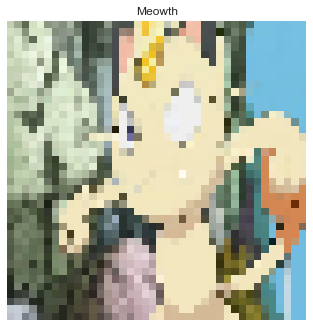

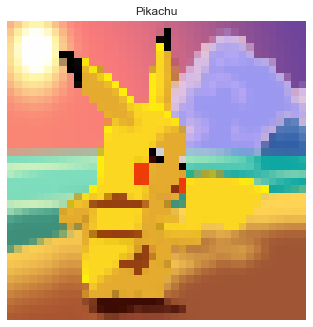

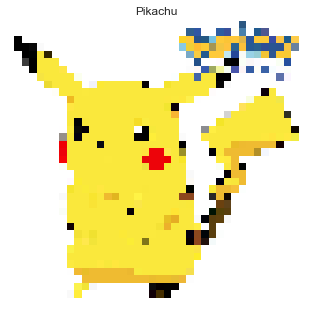

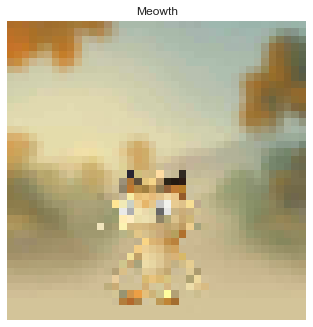

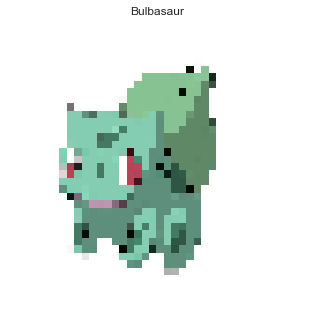

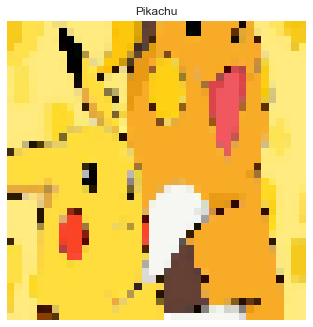

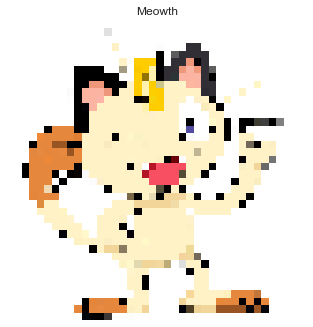

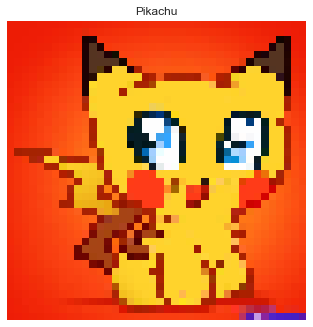

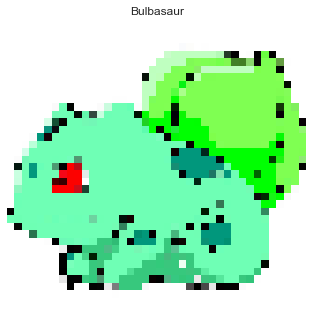

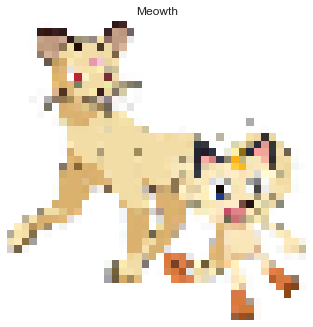

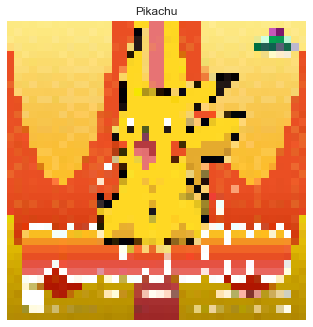

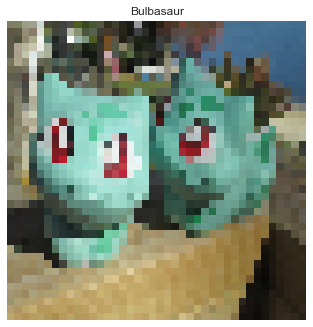

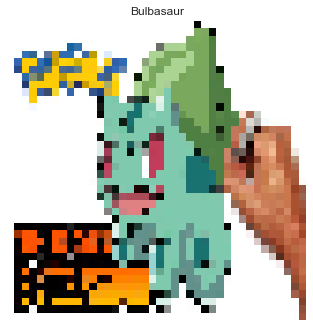

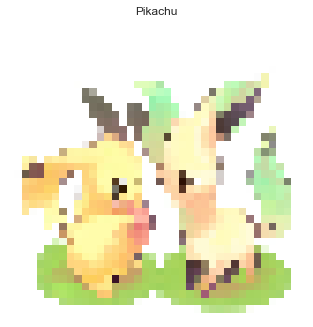

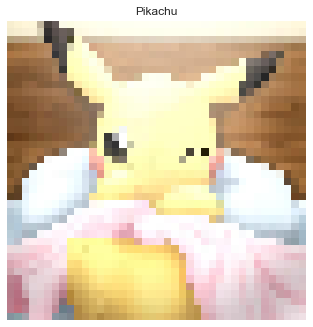

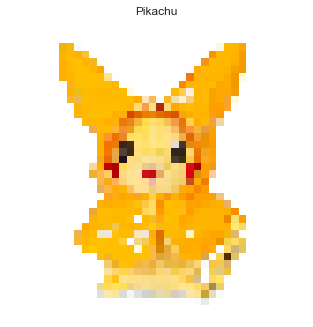

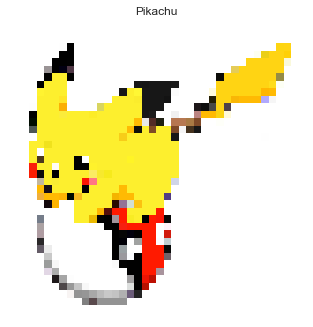

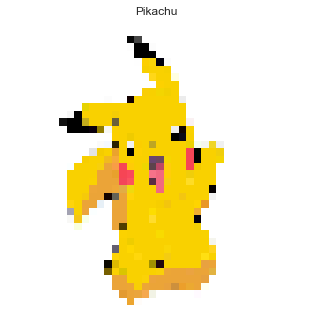

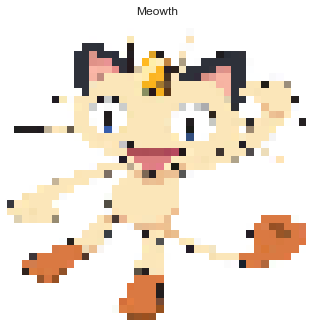

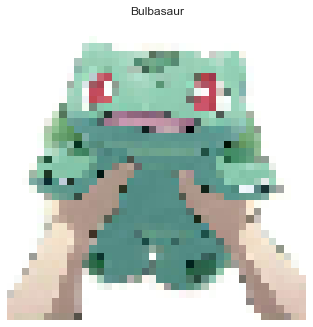

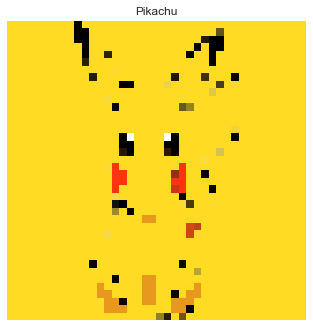

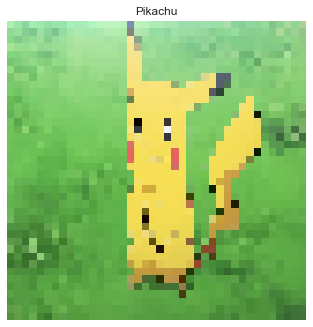

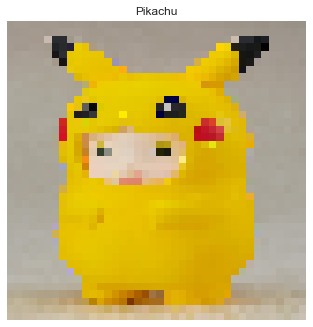

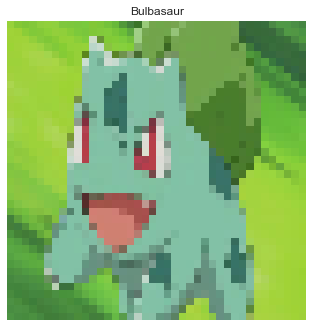

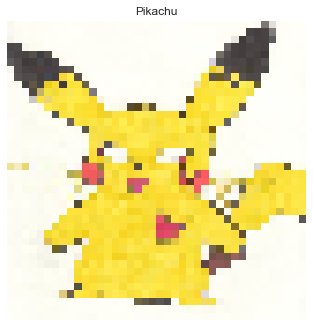

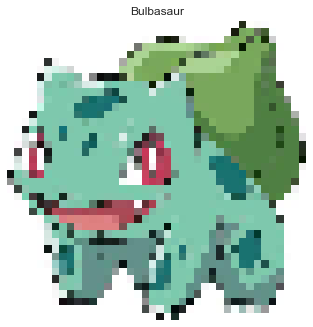

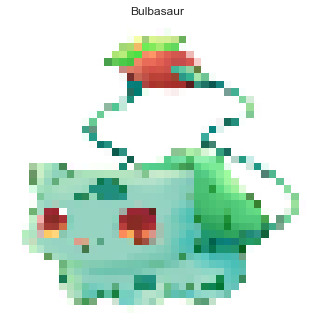

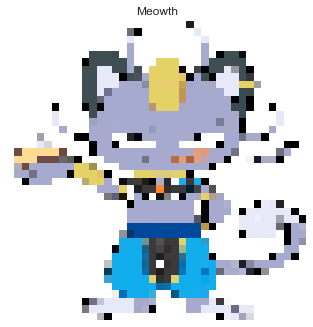

In [25]:
for i in range(30):
    drawImg(Xrand[i].reshape(40, 40, 3)/255.0, Yrand[i])

In [8]:
# Test-train split
split=int(X.shape[0]*0.8)
XT, Xt=Xrand[:split, :], Xrand[split:, :]
YT, Yt=Yrand[:split], Yrand[split:]
print(XT.shape, Xt.shape)

(353, 4800) (89, 4800)


In [33]:
# Helper functions
def softmax(Z):
    e_power_Z=np.exp(Z)
    return e_power_Z/np.sum(e_power_Z, axis=1, keepdims=True)

tanhDerivative=lambda A: 1-np.square(A) # Derivative of tanh(Z) is 1-(tanh(Z))^2, here A=tanh(Z)

def loss(Y1hot, Y_1hot): # Cross entropy loss
    l=-np.mean(Y1hot*np.log(Y_1hot))
    return l

def oneHot(Y, no_of_classes): # Convert label encoding to one hot encoding
    m=Y.shape[0]
    Y1hot=np.zeros((m, no_of_classes))
    Y1hot[np.arange(m), Y]=1
    return Y1hot


class NeuralNetwork:
    def __init__(self, input_size, output_size, hidden_layers, seed=0):
        np.random.seed(seed)
        model={}
        total_layers=len(hidden_layers)+1
        
        # First layer
        model['W0']=np.random.randn(input_size, hidden_layers[0])
        model['b0']=np.zeros((1, hidden_layers[0]))
        # Intermediate layers
        for i in range(total_layers-2):
            model['W'+str(i+1)]=np.random.randn(hidden_layers[i], hidden_layers[i+1])
            model['b'+str(i+1)]=np.zeros((1, hidden_layers[i+1]))
        # Last layer
        model['W'+str(total_layers-1)]=np.random.randn(hidden_layers[-1], output_size)
        model['b'+str(total_layers-1)]=np.zeros((1, output_size))
        
        self.total_layers=total_layers
        self.model=model
        self.activation_outputs=None
        self.no_output_classes=output_size
        self.no_input_features=input_size
        
    def forward(self, X):
        W, b={}, {}
        for i in range(self.total_layers):
            W[i]=self.model['W'+str(i)]
            b[i]=self.model['b'+str(i)]
        
        Z, A={}, {}
        # First layer
        Z[0]=np.dot(X, W[0])+b[0]
        A[0]=np.tanh(Z[0])
        # Intermediate layers
        for i in range(self.total_layers-2):
            Z[i+1]=np.dot(A[i], W[i+1])+b[i+1]
            A[i+1]=np.tanh(Z[i+1])
        # Last layer
        Z[self.total_layers-1]=np.dot(A[self.total_layers-2], W[self.total_layers-1])+b[self.total_layers-1]
        Y_1hot=softmax(Z[self.total_layers-1])
        
        self.activation_outputs=(A, Y_1hot)
        return Y_1hot
    
    def backward(self, X, Y1hot, learning_rate):
        W, b={}, {}
        for i in range(self.total_layers):
            W[i]=self.model['W'+str(i)]
            b[i]=self.model['b'+str(i)]
        m=X.shape[0]
        A, Y_1hot=self.activation_outputs
        
        delta, dW, db={}, {}, {}
        # Last layer
        delta[self.total_layers-1]=Y_1hot-Y1hot
        dW[self.total_layers-1]=np.dot(A[self.total_layers-2].T, delta[self.total_layers-1])
        db[self.total_layers-1]=np.sum(delta[self.total_layers-1], axis=0)
        # Intermediate layers
        for i in range(self.total_layers-2, 0, -1):
            delta[i]=tanhDerivative(A[i])*np.dot(delta[i+1],W[i+1].T)
            dW[i]=np.dot(A[i-1].T, delta[i])
            db[i]=np.sum(delta[i], axis=0)
        # First layer
        delta[0]=tanhDerivative(A[0])*np.dot(delta[1],W[1].T)
        dW[0]=np.dot(X.T, delta[0])
        db[0]=np.sum(delta[0], axis=0)
        
        # Update model parameters using Gradient Descent
        for i in range(self.total_layers):
            self.model['W'+str(i)]-=learning_rate*dW[i]
            self.model['b'+str(i)]-=learning_rate*db[i]
        
    def predict(self, X):
        Y_1hot=self.forward(X)
        Y_=np.argmax(Y_1hot, axis=1)
        return Y_

    def summary(self):
        print("Total layers:", self.total_layers)
        print("Number of input features:", self.no_input_features)
        print("Number of output classes:", self.no_output_classes)
        print("Shapes of weights and biases:")
        total_params=0
        for i in range(self.total_layers):
            print('W'+str(i), self.model['W'+str(i)].shape)
            print('b'+str(i), self.model['b'+str(i)].shape)
            total_params+=self.model['W'+str(i)].shape[0] * self.model['W'+str(i)].shape[1]  +  self.model['b'+str(i)].shape[1]
        print("Total parameters", total_params)

    def accuracy(self, X, Y):
        Y_=self.predict(X)
        return np.sum(Y_==Y)/float(Y.shape[0])

    def train(self, X, Y, max_epochs=500, learning_rate=0.001, logs=True, validation_set=None):
        no_classes=self.no_output_classes
        losses={'training': [], 'validation': None}
        accuracy_list={'training': [], 'validation': None}
        Y1hot=oneHot(Y, no_classes)
        if validation_set is not None:
            Xval=validation_set[0]
            Yval=validation_set[1]
            losses['validation']=[]
            accuracy_list['validation']=[]
            Yval1hot=oneHot(Yval, no_classes)
        Y1hot=oneHot(Y, no_classes)
        for epoch in range(max_epochs):
            Y_1hot=model.forward(X) #Forward propagation
            
            # Loss
            l=loss(Y1hot, Y_1hot)
            losses['training'].append(l)
            # Accuracy
            acc=self.accuracy(X, Y)
            accuracy_list['training'].append(acc)
            
            model.backward(X, Y1hot, learning_rate) # Backward propagation

            # Validation loss
            if validation_set is not None:
                Y_val1hot=model.forward(Xval) #Forward propagation
                val_l=loss(Yval1hot, Y_val1hot)
                losses['validation'].append(val_l)
                val_acc=self.accuracy(Xval, Yval)
                accuracy_list['validation'].append(val_acc)
            if logs and epoch%10==0:
                print("Epoch: %d Training Loss: %.4f"%(epoch, l))
        return losses, accuracy_list

In [27]:
model=NeuralNetwork(input_size=X.shape[1], output_size=len(label_list), hidden_layers=[100, 50], seed=1)
model.summary()

Total layers: 3
Number of input features: 4800
Number of output classes: 3
Shapes of weights and biases:
W0 (4800, 100)
b0 (1, 100)
W1 (100, 50)
b1 (1, 50)
W2 (50, 3)
b2 (1, 3)
Total parameters 485303


In [28]:
losses, accuracy_list=model.train(XT, YT, 500, 0.002, validation_set=(Xt, Yt))

Epoch: 0 Training Loss: 2.4575
Epoch: 10 Training Loss: 0.6152
Epoch: 20 Training Loss: 1.0070
Epoch: 30 Training Loss: 0.4657
Epoch: 40 Training Loss: 0.4685
Epoch: 50 Training Loss: 0.3757
Epoch: 60 Training Loss: 0.2137
Epoch: 70 Training Loss: 0.1620
Epoch: 80 Training Loss: 0.1525
Epoch: 90 Training Loss: 0.0715
Epoch: 100 Training Loss: 0.0774
Epoch: 110 Training Loss: 0.0748
Epoch: 120 Training Loss: 0.0462
Epoch: 130 Training Loss: 0.0408
Epoch: 140 Training Loss: 0.0365
Epoch: 150 Training Loss: 0.0324
Epoch: 160 Training Loss: 0.0292
Epoch: 170 Training Loss: 0.0268
Epoch: 180 Training Loss: 0.0249
Epoch: 190 Training Loss: 0.0232
Epoch: 200 Training Loss: 0.0217
Epoch: 210 Training Loss: 0.0204
Epoch: 220 Training Loss: 0.0192
Epoch: 230 Training Loss: 0.0181
Epoch: 240 Training Loss: 0.0171
Epoch: 250 Training Loss: 0.0162
Epoch: 260 Training Loss: 0.0153
Epoch: 270 Training Loss: 0.0146
Epoch: 280 Training Loss: 0.0139
Epoch: 290 Training Loss: 0.0132
Epoch: 300 Training L

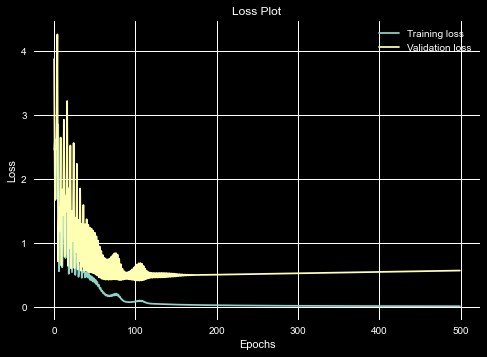

In [29]:
# Loss plot
plt.style.use('dark_background')
plt.title("Loss Plot")
plt.plot(losses['training'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

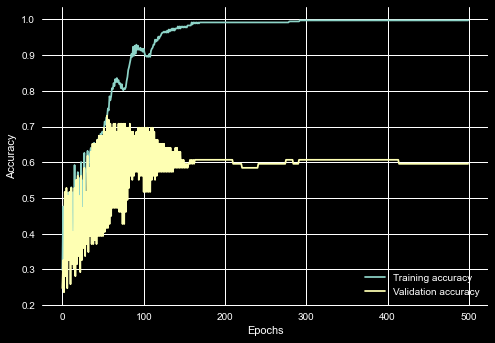

In [30]:
# Accuracy visualization
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(accuracy_list['training'], label='Training accuracy')
plt.plot(accuracy_list['validation'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
print("Train accuracy percentage:%4.f"%(model.accuracy(XT, YT)*100))
print("Test accuracy percentage:%4.f"%(model.accuracy(Xt, Yt)*100))

Train accuracy percentage: 100
Test accuracy percentage:  60


There is some overfitting. Accuracy can be increased by early stopping at around 210 epochs and/or by increasing the number of hidden layers

In [36]:
# Decreasing number of epochs
model=NeuralNetwork(input_size=X.shape[1], output_size=len(label_list), hidden_layers=[100, 50], seed=1)
losses=model.train(XT, YT, 110, 0.002, logs=False)
print("Test accuracy percentage:%4.f"%(model.accuracy(Xt, Yt)*100))

Test accuracy percentage:  70


In [41]:
# Increasing hidden layers
model=NeuralNetwork(input_size=X.shape[1], output_size=len(label_list), hidden_layers=[100, 50, 50])
model.summary()
losses=model.train(XT, YT, 150, 0.002, logs=False)
print("Test accuracy percentage:%4.f"%(model.accuracy(Xt, Yt)*100))

Total layers: 4
Number of input features: 4800
Number of output classes: 3
Shapes of weights and biases:
W0 (4800, 100)
b0 (1, 100)
W1 (100, 50)
b1 (1, 50)
W2 (50, 50)
b2 (1, 50)
W3 (50, 3)
b3 (1, 3)
Total parameters 487853
Test accuracy percentage:  69


In [42]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
Y_=model.predict(X)
cnf_mat=confusion_matrix(Y_, Y)
print(cnf_mat)

[[195   9   9]
 [  3 161   3]
 [  1   3  58]]


Confusion matrix, without normalization
[[195   9   9]
 [  3 161   3]
 [  1   3  58]]


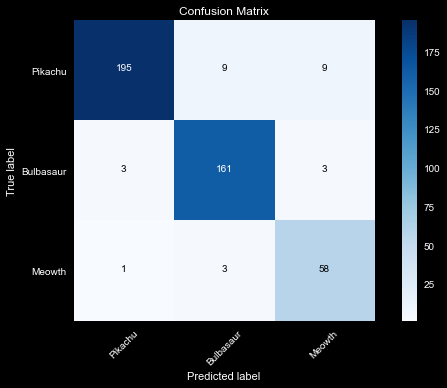

In [43]:
# Confusiton matrix plot
from visualize import plot_confusion_matrix
plt.grid(False)
plot_confusion_matrix(cnf_mat, classes=label_list, title="Confusion Matrix")
plt.show()

In [44]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_, Y))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       213
           1       0.93      0.96      0.95       167
           2       0.83      0.94      0.88        62

    accuracy                           0.94       442
   macro avg       0.91      0.94      0.92       442
weighted avg       0.94      0.94      0.94       442



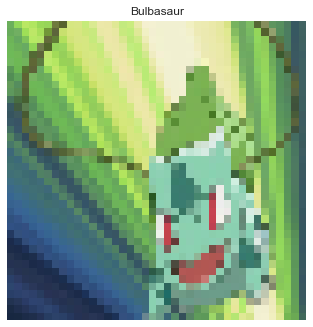

Prediction: Meowth


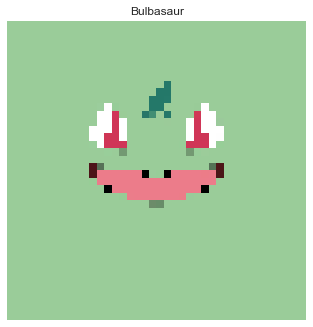

Prediction: Pikachu


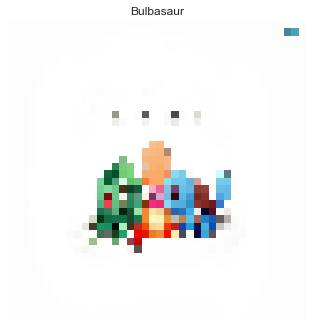

Prediction: Pikachu


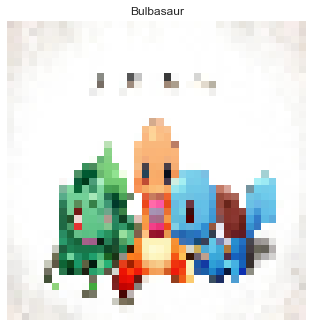

Prediction: Pikachu


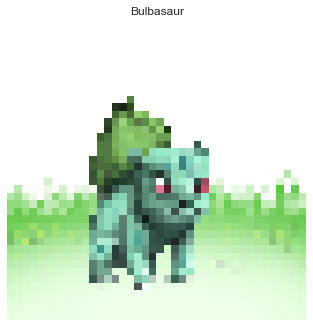

Prediction: Pikachu


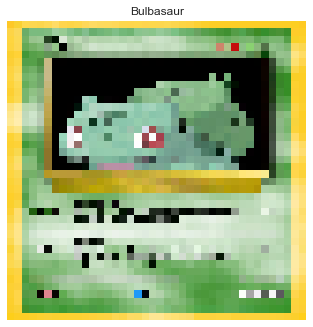

Prediction: Meowth


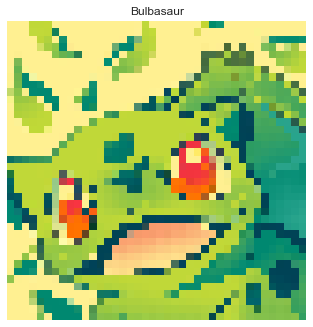

Prediction: Pikachu


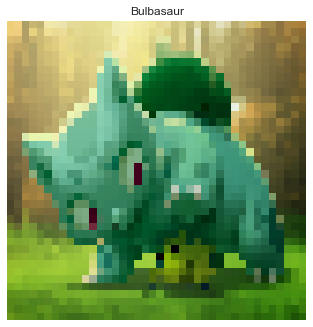

Prediction: Pikachu


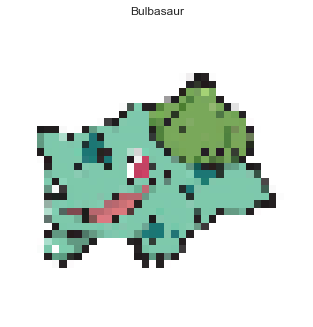

Prediction: Pikachu


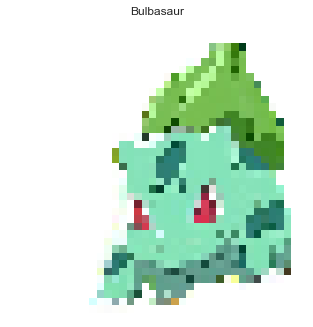

Prediction: Pikachu


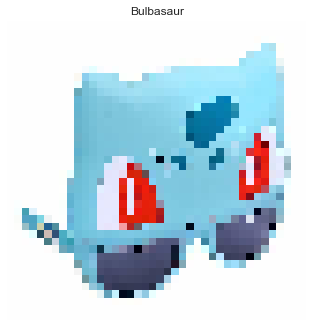

Prediction: Meowth


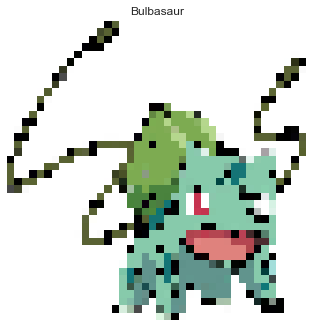

Prediction: Pikachu


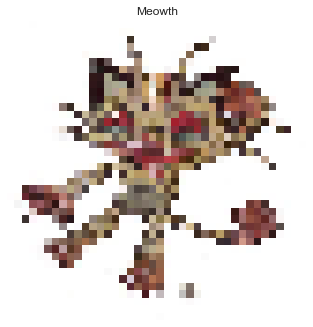

Prediction: Pikachu


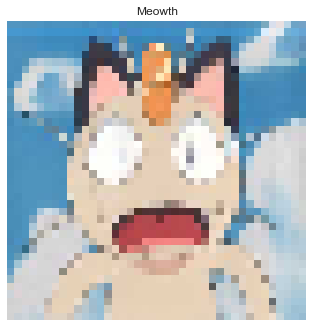

Prediction: Bulbasaur


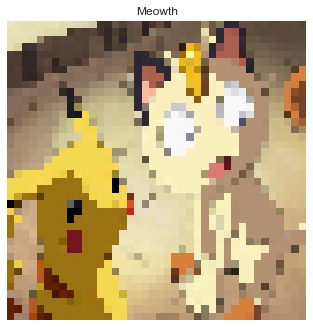

Prediction: Pikachu


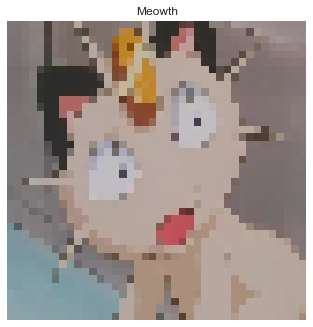

Prediction: Bulbasaur


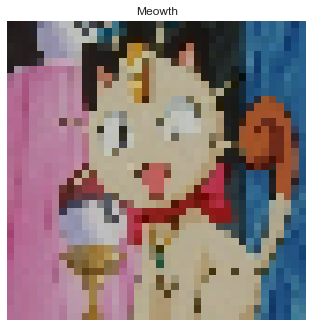

Prediction: Pikachu


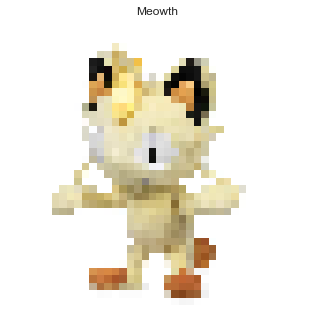

Prediction: Pikachu


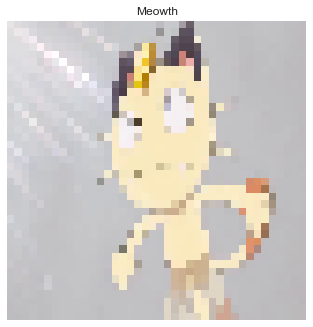

Prediction: Pikachu


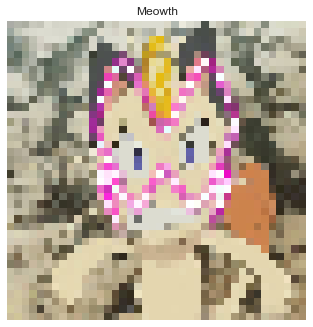

Prediction: Pikachu


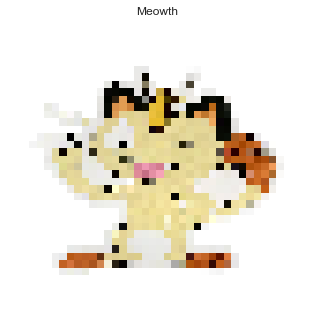

Prediction: Pikachu


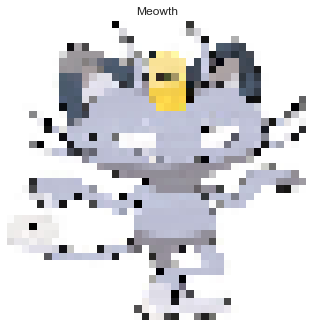

Prediction: Pikachu


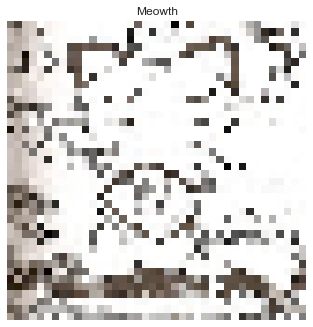

Prediction: Bulbasaur


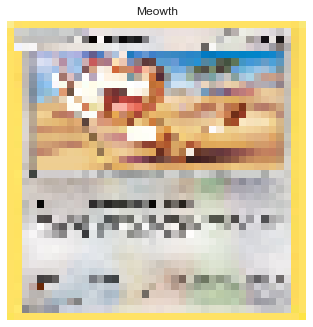

Prediction: Pikachu


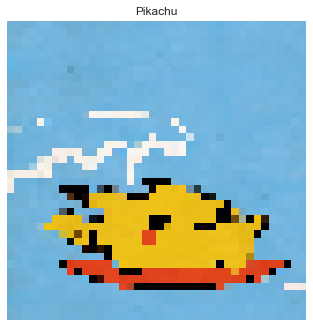

Prediction: Bulbasaur


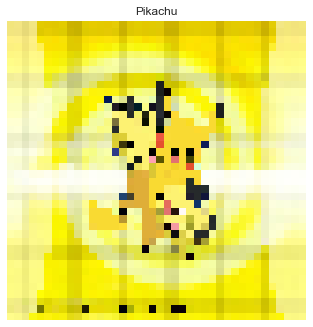

Prediction: Meowth


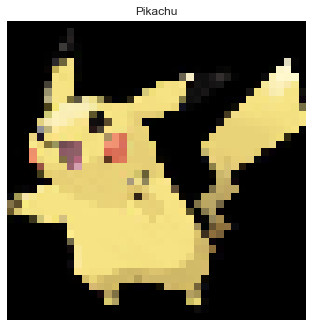

Prediction: Bulbasaur


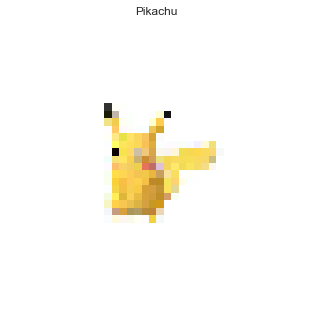

Prediction: Bulbasaur
Total misclassifications: 28


In [45]:
# Visualize misclassifications
count=0
for i in range(X.shape[0]):
    if Y_[i]!=Y[i]:
        count+=1
        drawImg(X[i].reshape(40, 40, 3)/255.0, Y[i])
        print("Prediction:", label_list[Y_[i]])
print("Total misclassifications:", count)

The accuracy can be further increased by a significant value by using advance neural networks like CNN instead of using MLP as the model